# LSTM for single varaite time sereis analysis

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df=pd.read_csv(csv_path)

In [4]:
df

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
0       01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90   
1       01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28   
2       01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31   
3       01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07   
4       01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04   
...                     ...       ...       ...       ...          ...   
420546  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
420547  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
420548  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
420549  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
420550  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
0        93.30          3.33          3.11          0.22       1.94   
1        93.40          3.23          3.02          0.21       1.89   
2        93.90          3.21          3.01          0.20       1.88   
3        94.20          3.26          3.07          0.19       1.92   
4        94.10          3.27          3.08          0.19       1.92   
...        ...           ...           ...           ...        ...   
420546   73.10          4.52          3.30          1.22       2.06   
420547   69.71          4.77          3.32          1.44       2.07   
420548   67.91          4.84          3.28          1.55       2.05   
420549   71.80          4.46          3.20          1.26       1.99   
420550   75.70          4.27          3.23          1.04       2.01   

        H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0                  3.12       1307.75      1.03           1.75     152.3  
1                  3.03       1309.80      0.72           1.50     136.1  
2                  3.02       1310.24      0.19           0.63     171.6  
3                  3.08       1309.19      0.34           0.50     198.0  
4                  3.09       1309.00      0.32           0.63     214.3  
...                 ...           ...       ...            ...       ...  
420546             3.30       1292.98      0.67           1.52     240.0  
420547             3.32       1289.44      1.14           1.92     234.3  
420548             3.28       1288.39      1.08           2.00     215.2  
420549             3.20       1293.56      1.49           2.16     225.8  
420550             3.23       1296.38      1.23           1.96     184.9  

[420551 rows x 15 columns]

In [5]:
df=df[5::6]

In [6]:
df

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
5       01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78   
11      01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77   
17      01.01.2009 03:00:00    996.84     -8.81    264.59        -9.66   
23      01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02   
29      01.01.2009 05:00:00    997.46     -9.63    263.72       -10.65   
...                     ...       ...       ...       ...          ...   
420521  31.12.2016 19:10:00   1002.18     -0.98    272.01        -5.36   
420527  31.12.2016 20:10:00   1001.40     -1.40    271.66        -6.84   
420533  31.12.2016 21:10:00   1001.19     -2.75    270.32        -6.90   
420539  31.12.2016 22:10:00   1000.65     -2.89    270.22        -7.15   
420545  31.12.2016 23:10:00   1000.11     -3.93    269.23        -8.09   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
5        94.40          3.33          3.14          0.19       1.96   
11       93.20          3.12          2.90          0.21       1.81   
17       93.50          3.13          2.93          0.20       1.83   
23       92.60          3.07          2.85          0.23       1.78   
29       92.20          2.94          2.71          0.23       1.69   
...        ...           ...           ...           ...        ...   
420521   72.00          5.69          4.09          1.59       2.54   
420527   66.29          5.51          3.65          1.86       2.27   
420533   72.90          4.99          3.64          1.35       2.26   
420539   72.30          4.93          3.57          1.37       2.22   
420545   72.60          4.56          3.31          1.25       2.06   

        H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
5                  3.15       1307.86      0.21           0.63     192.7  
11                 2.91       1312.25      0.25           0.63     190.3  
17                 2.94       1312.18      0.18           0.63     167.2  
23                 2.85       1313.61      0.10           0.38     240.0  
29                 2.71       1317.19      0.40           0.88     157.0  
...                 ...           ...       ...            ...       ...  
420521             4.08       1280.70      0.87           1.36     190.6  
420527             3.65       1281.87      1.02           1.92     225.4  
420533             3.63       1288.02      0.71           1.56     158.7  
420539             3.57       1288.03      0.35           0.68     216.7  
420545             3.31       1292.41      0.56           1.00     202.6  

[70091 rows x 15 columns]

In [7]:
df.shape

(70091, 15)

In [8]:
df.index=pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')

In [9]:
df.index

DatetimeIndex(['2009-01-01 01:00:00', '2009-01-01 02:00:00',
               '2009-01-01 03:00:00', '2009-01-01 04:00:00',
               '2009-01-01 05:00:00', '2009-01-01 06:00:00',
               '2009-01-01 07:00:00', '2009-01-01 08:00:00',
               '2009-01-01 09:00:00', '2009-01-01 10:00:00',
               ...
               '2016-12-31 14:10:00', '2016-12-31 15:10:00',
               '2016-12-31 16:10:00', '2016-12-31 17:10:00',
               '2016-12-31 18:10:00', '2016-12-31 19:10:00',
               '2016-12-31 20:10:00', '2016-12-31 21:10:00',
               '2016-12-31 22:10:00', '2016-12-31 23:10:00'],
              dtype='datetime64[ns]', name='Date Time', length=70091, freq=None)

(70091,)

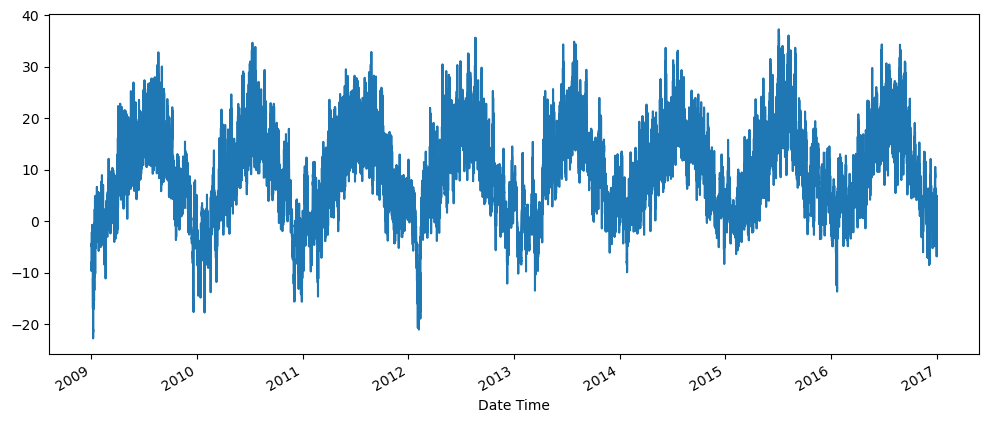

In [10]:
temp=df['T (degC)']
temp.plot(figsize=(12,5))
temp.shape


In [11]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [12]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [13]:
X1,y1=df_to_X_y(temp,5)
X1.shape,y1.shape

((70086, 5, 1), (70086,))

In [14]:
X_train,y_train=X1[:60000],y1[:60000]
X_val,y_val=X1[60000:65000],y1[60000:65000]
X_test,y_test=X1[65000:],y1[65000:]


X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [15]:
y_test

array([13.99, 13.46, 12.93, ..., -2.75, -2.89, -3.93])

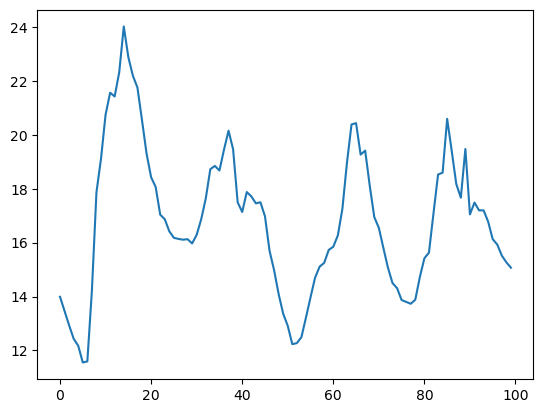

In [16]:
plt.plot(y_test[:100])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [18]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [19]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 67.1675 - root_mean_squared_error: 8.1956

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 18s 8ms/step - loss: 67.1403 - root_mean_squared_error: 8.1939 - val_loss: 4.0288 - val_root_mean_squared_error: 2.0072
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 7.3965 - root_mean_squared_error: 2.7197

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 14s 7ms/step - loss: 7.3839 - root_mean_squared_error: 2.7173 - val_loss: 0.7832 - val_root_mean_squared_error: 0.8850
Epoch 3/10
1865/1875 [============================>.] - ETA: 0s - loss: 1.7635 - root_mean_squared_error: 1.3280

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 1.7605 - root_mean_squared_error: 1.3268 - val_loss: 0.5631 - val_root_mean_squared_error: 0.7504
Epoch 4/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.9157 - root_mean_squared_error: 0.9569

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.9150 - root_mean_squared_error: 0.9565 - val_loss: 0.5106 - val_root_mean_squared_error: 0.7146
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.7340 - root_mean_squared_error: 0.8567

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.7335 - root_mean_squared_error: 0.8565 - val_loss: 0.5019 - val_root_mean_squared_error: 0.7084
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6842 - root_mean_squared_error: 0.8271 - val_loss: 0.5037 - val_root_mean_squared_error: 0.7097
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6665 - root_mean_squared_error: 0.8164

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6664 - root_mean_squared_error: 0.8163 - val_loss: 0.4953 - val_root_mean_squared_error: 0.7038
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6572 - root_mean_squared_error: 0.8107 - val_loss: 0.4967 - val_root_mean_squared_error: 0.7048
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6514 - root_mean_squared_error: 0.8071 - val_loss: 0.5143 - val_root_mean_squared_error: 0.7172
Epoch 10/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.6482 - root_mean_squared_error: 0.8051

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.6479 - root_mean_squared_error: 0.8049 - val_loss: 0.4841 - val_root_mean_squared_error: 0.6958


In [20]:
from tensorflow.keras.models import load_model

In [21]:
model1=load_model(filepath='model1/')

In [22]:
train_predictions=model1.predict(X_train).flatten()
train_predictions.shape

1875/1875 [==============================] - 6s 3ms/step


(60000,)

In [23]:
X_train.shape

(60000, 5, 1)

In [24]:
result=pd.DataFrame(data={'train predictiosn':train_predictions,'Actuals:':y_train})

In [25]:
result

train predictiosn  Actuals:
0              -9.697010     -9.67
1              -9.601022     -9.17
2              -8.718252     -8.10
3              -7.185481     -7.66
4              -7.063725     -7.04
...                  ...       ...
59995           6.247957      6.07
59996           7.134071      9.88
59997          12.413704     13.53
59998          15.903719     15.43
59999          16.164560     15.54

[60000 rows x 2 columns]

Text(0.5, 1.0, 'Actual vs predictions of triaining data')

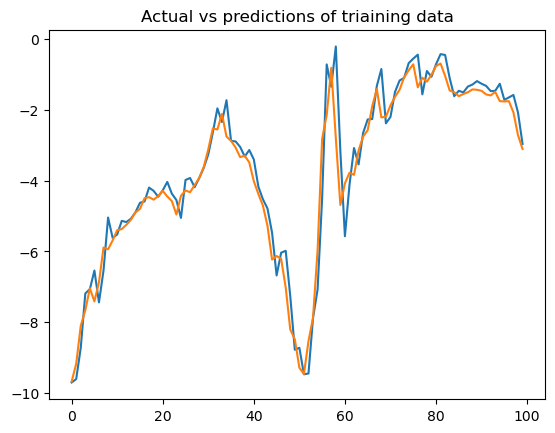

In [26]:
plt.plot(result['train predictiosn'][:100])
plt.plot(result['Actuals:'][:100])
plt.x_label='samples'
plt.y_label='predictions'
plt.title("Actual vs predictions of triaining data")

In [27]:
val_predictions=model1.predict(X_val).flatten()

157/157 [==============================] - 1s 2ms/step


In [28]:
val_result=pd.DataFrame(data={'val_predictions':val_predictions,'Actual':y_val})

In [29]:
val_result

val_predictions  Actual
0           15.444502   14.02
1           13.301296   13.67
2           13.090973   12.27
3           11.510268   11.19
4           10.421116   10.85
...               ...     ...
4995        17.246668   18.27
4996        17.342480   17.85
4997        17.288218   16.65
4998        15.886036   15.85
4999        15.115996   15.09

[5000 rows x 2 columns]

Text(0.5, 1.0, 'validation predictions vs actual ')

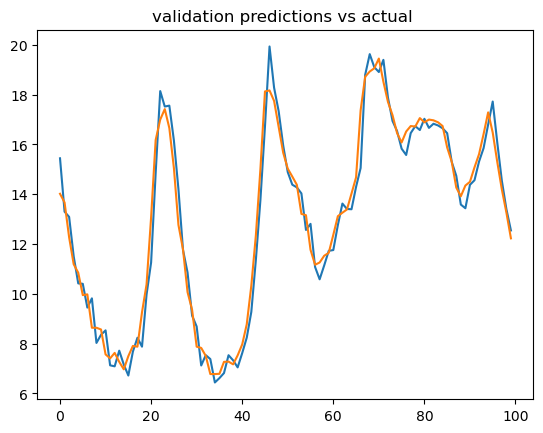

In [30]:
plt.plot(val_result[:100])
plt.title("validation predictions vs actual ")

In [31]:
test_predictions=model1.predict(X_test).flatten()

159/159 [==============================] - 0s 2ms/step


In [32]:
len(test_predictions)

5086

In [33]:
y_test
test_predictions

array([14.434204 , 13.271992 , 12.895322 , ..., -1.6087523, -3.2801201,
       -3.0976145], dtype=float32)

In [34]:
test_result=pd.DataFrame(data={'test_predictions':test_predictions,'test_actual':y_test})

Text(0.5, 1.0, 'test data actual vs predictions')

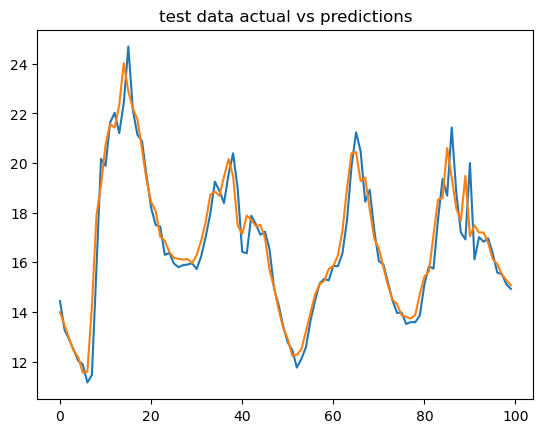

In [35]:
plt.plot(test_result[:100])
plt.title("test data actual vs predictions")

<AxesSubplot:>

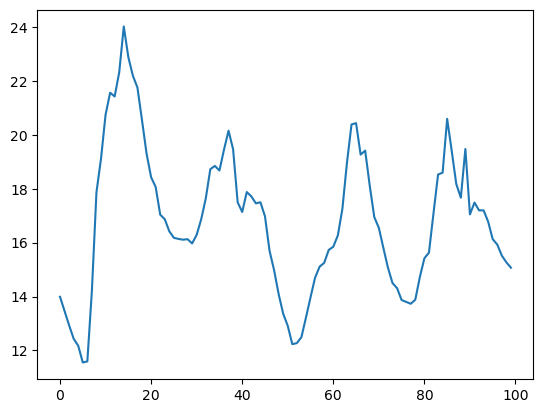

In [36]:
test_result['test_actual'][:100].plot()

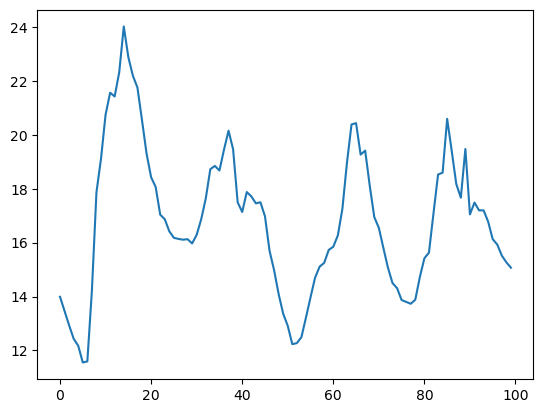

In [37]:
plt.plot(y_test[:100])

# Testing the same way of analysis with different activation functions and multiple lstm layers

In [40]:
x=np.array(df['T (degC)'])
temp=scalar.fit_transform(x.reshape(-1,1))

In [41]:
temp=df['T (degC)']
#temp=np.array(temp)
#temp=scalar.fit_transform(temp.reshape(-1,1))
#temp.reshape(temp.shape[0])
#temp=temp.reshape(temp.shape[0])
temp.shape
temp.shape

(70091,)

In [42]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size):
    #df_as_np = df.to_numpy()
    
    X = []
    y = []
    for i in range(len(df)-window_size):
        row = [[a] for a in df[i:i+window_size]]
        X.append(row)
        label = df[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [43]:

WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape


((70086, 5, 1), (70086,))

In [44]:
X_train,y_train=X1[:60000],y1[:60000]
X_val,y_val=X1[60000:65000],y1[60000:65000]
X_test,y_test=X1[65000:],y1[65000:]


X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

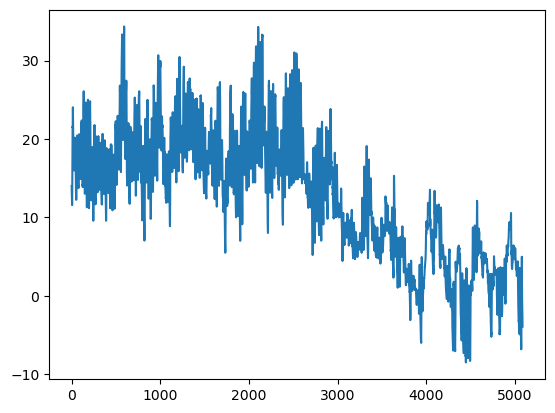

In [45]:
plt.plot(y_test)

In [48]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(LSTM(64,activation='tanh',return_sequences=True))
model2.add(LSTM(50,activation='tanh',return_sequences=True))
model2.add(LSTM(25,activation='tanh',return_sequences=False))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 5, 64)             16896     
                                                                 
 lstm_8 (LSTM)               (None, 5, 50)             23000     
                                                                 
 lstm_9 (LSTM)               (None, 25)                7600      
                                                                 
 dense_6 (Dense)             (None, 10)                260       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 47,767
Trainable params: 47,767
Non-trainable params: 0
_________________________________________________________________


In [49]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=['mae'])


In [50]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_test.shape

(5086, 5, 1)

In [51]:
model2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,callbacks=[cp2])

Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 1.1979 - mae: 1.1979

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 37s 18ms/step - loss: 1.1964 - mae: 1.1964 - val_loss: 0.5586 - val_mae: 0.5586
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.5839 - mae: 0.5839

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 31s 17ms/step - loss: 0.5838 - mae: 0.5838 - val_loss: 0.4945 - val_mae: 0.4945
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5714 - mae: 0.5714 - val_loss: 0.5181 - val_mae: 0.5181
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5702 - mae: 0.5702

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 30s 16ms/step - loss: 0.5702 - mae: 0.5702 - val_loss: 0.4909 - val_mae: 0.4909
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5619 - mae: 0.5619 - val_loss: 0.4964 - val_mae: 0.4964
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5631 - mae: 0.5631 - val_loss: 0.5526 - val_mae: 0.5526
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5618 - mae: 0.5618 - val_loss: 0.5229 - val_mae: 0.5229
Epoch 8/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.5604 - mae: 0.5604

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 37s 20ms/step - loss: 0.5603 - mae: 0.5603 - val_loss: 0.4908 - val_mae: 0.4908
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5558 - mae: 0.5558

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 36s 19ms/step - loss: 0.5558 - mae: 0.5558 - val_loss: 0.4799 - val_mae: 0.4799
Epoch 10/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5600 - mae: 0.5600 - val_loss: 0.5116 - val_mae: 0.5116


In [52]:
y_test

array([13.99, 13.46, 12.93, ..., -2.75, -2.89, -3.93])

In [53]:
prediction=model2.predict(X_test).flatten()

159/159 [==============================] - 3s 5ms/step


In [54]:

prediction

array([14.612127 , 13.416747 , 13.1420355, ..., -1.8372743, -3.3304858,
       -3.1090474], dtype=float32)

In [55]:
len(prediction)

5086

In [56]:
y_test.shape

(5086,)

In [57]:
df=pd.DataFrame(data={'predicted':prediction,"actual":y_test})

In [58]:
df

predicted  actual
0     14.612127   13.99
1     13.416747   13.46
2     13.142035   12.93
3     12.701161   12.43
4     12.265224   12.17
...         ...     ...
5081  -0.971326   -0.98
5082  -1.592831   -1.40
5083  -1.837274   -2.75
5084  -3.330486   -2.89
5085  -3.109047   -3.93

[5086 rows x 2 columns]

In [59]:
y_test

array([13.99, 13.46, 12.93, ..., -2.75, -2.89, -3.93])

<AxesSubplot:>

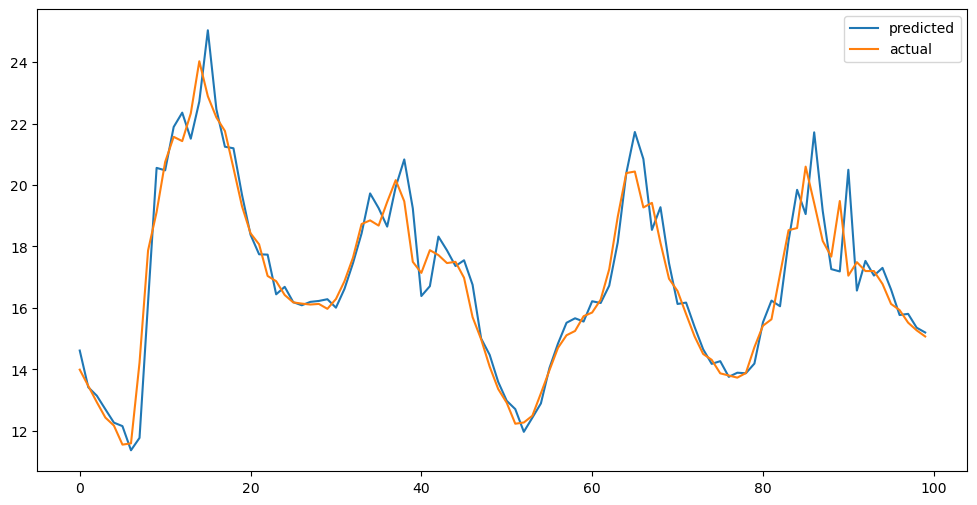

In [60]:
df.iloc[:100].plot(figsize=(12,6))

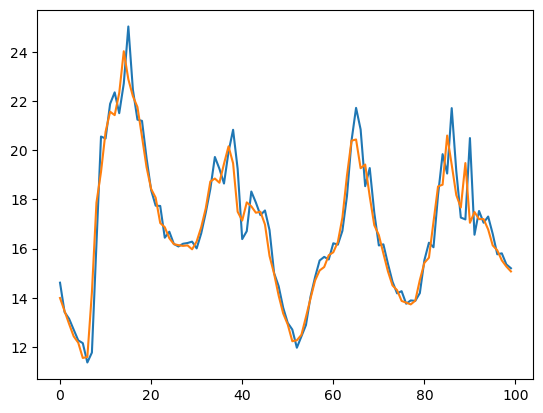

In [61]:
plt.plot(figsize=(15,6))
plt.plot(prediction[:100])
plt.plot(df['actual'][:100])

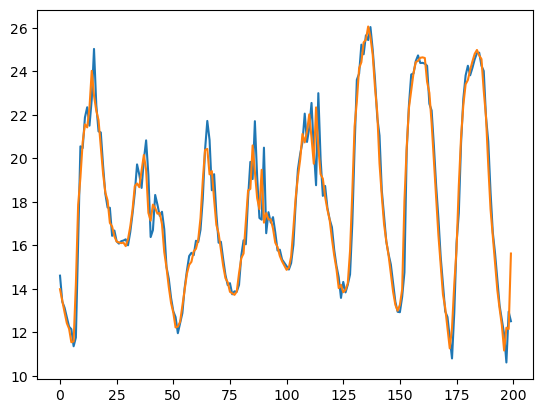

In [62]:
plt.plot(df['predicted'][:200])
plt.plot(df['actual'][:200])

In [63]:
predic_out=model2.predict([[[50],[60],[70],[80],[90]]])

1/1 [==============================] - 1s 1s/step


In [64]:
predic_out

array([[36.562927]], dtype=float32)

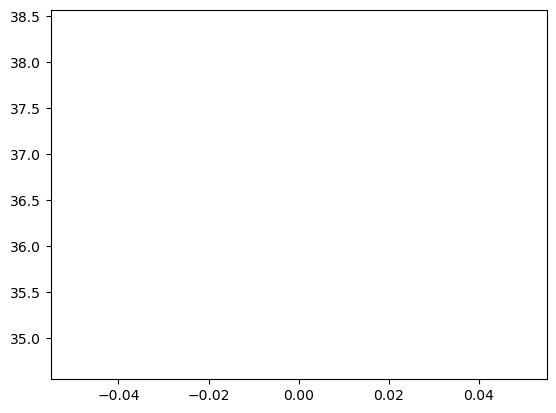

In [65]:
#plt.scatter(predic_out,y_test)
plt.plot(predic_out)

# Testing on complete new data that model has not seen 

In [66]:
df2=pd.read_csv('TSLA.csv')

In [67]:
df2.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333   
1  2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   
2  2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   
3  2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   
4  2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   

      Volume  
0  171912000  
1   91171500  
2   72142500  
3   50277000  
4   43791000

In [68]:
df2=df2.set_index(df2['Date'])

In [69]:
df2=df2.drop('Date',axis=1)

In [70]:
df2['Open'].max()

411.470001

In [71]:
x=df2['Open']
x=np.array(x)
x=scalar.fit_transform(x.reshape(-1,1))
x=x.reshape(1258)

In [72]:
X1,y1=df_to_X_y(x,5)
X1

array([[[-0.71096797],
        [-0.7134609 ],
        [-0.70720352],
        [-0.71000337],
        [-0.70935821]],

       [[-0.7134609 ],
        [-0.70720352],
        [-0.71000337],
        [-0.70935821],
        [-0.71113083]],

       [[-0.70720352],
        [-0.71000337],
        [-0.70935821],
        [-0.71113083],
        [-0.7086191 ]],

       ...,

       [[ 1.98238665],
        [ 1.83187137],
        [ 1.95222729],
        [ 1.99622926],
        [ 1.99375537]],

       [[ 1.83187137],
        [ 1.95222729],
        [ 1.99622926],
        [ 1.99375537],
        [ 1.90838187]],

       [[ 1.95222729],
        [ 1.99622926],
        [ 1.99375537],
        [ 1.90838187],
        [ 1.74593416]]])

In [73]:
X1.shape,y1.shape

((1253, 5, 1), (1253,))

In [74]:
y1

array([-0.71113083, -0.7086191 , -0.71170081, ...,  1.90838187,
        1.74593416,  1.73434639])

In [75]:
predict=model2.predict(X1).flatten()

40/40 [==============================] - 0s 4ms/step


In [76]:
predict

array([-0.66580296, -0.66956604, -0.66388774, ...,  2.0672925 ,
        1.9260805 ,  1.7201103 ], dtype=float32)

In [77]:
df=pd.DataFrame(data={'predicted':predict,'actual':y1})

In [78]:
df

predicted    actual
0     -0.665803 -0.711131
1     -0.669566 -0.708619
2     -0.663888 -0.711701
3     -0.670514 -0.711306
4     -0.668263 -0.712196
...         ...       ...
1248   2.059328  1.996229
1249   2.087380  1.993755
1250   2.067292  1.908382
1251   1.926080  1.745934
1252   1.720110  1.734346

[1253 rows x 2 columns]

Text(0.5, 1.0, 'Actual vs predicted of complete new data ')

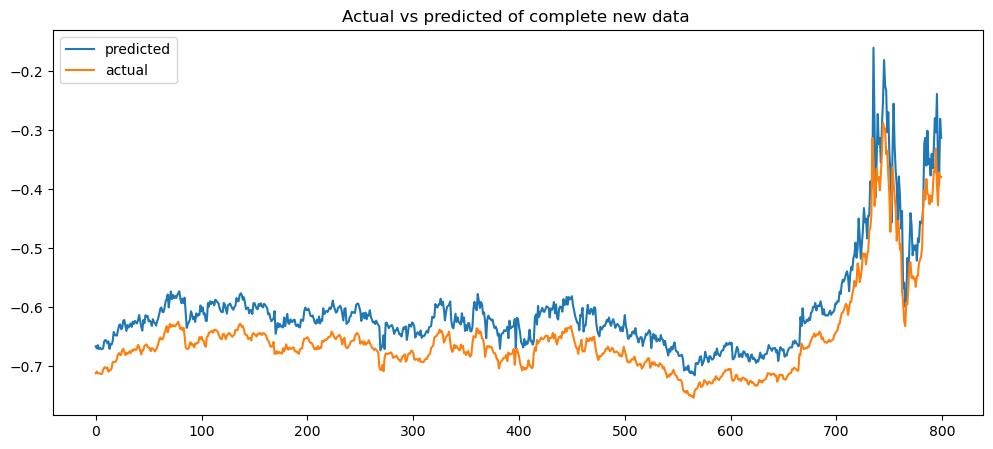

In [79]:
df.iloc[:800].plot(figsize=(12,5))
plt.title("Actual vs predicted of complete new data ")